### Setting up the environment [grid] with obstacles

In [1]:
import numpy as np

GRID_SIZE = 100
START = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
GOAL = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
while GOAL == START:  
    GOAL = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))

#### OBSTACLES

In [2]:
grid = np.zeros((GRID_SIZE, GRID_SIZE))
num_obstacles = int(0.2 * GRID_SIZE * GRID_SIZE)  # 20% obstacles

for _ in range(num_obstacles):
    x, y = np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE)
    if (x, y) != START and (x, y) != GOAL:
        grid[x, y] = -1  # Obstacle represented as -1

In [3]:
grid[START] = 1  # Start point
grid[GOAL] = 2   # Goal point

### Setting up the actions, states, rewards and transition probabilities 

In [4]:
ACTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
REWARD_GOAL = 10
REWARD_MOVE = -1
REWARD_OBSTACLE = -10

def get_next_state(state, action):
    x, y = state
    dx, dy = action
    nx, ny = x + dx, y + dy
    if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] != -1:
        return nx, ny
    return state  # No movement if out of bounds or obstacle

#### Value Iteration using Dynamic Programming

In [5]:
def value_iteration(gamma=0.9, theta=1e-4):
    V = np.zeros((GRID_SIZE, GRID_SIZE))  # Initialize value function
    while True:
        delta = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if (x, y) == GOAL:
                    continue
                v = V[x, y]
                V[x, y] = max(REWARD_MOVE + gamma * V[get_next_state((x, y), action)]
                              for action in ACTIONS)
                delta = max(delta, abs(v - V[x, y]))
        if delta < theta:
            break
    return V

### Q-Learning

In [6]:
import random

def q_learning(alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))  # Initialize Q-values

    for episode in range(episodes):
        state = START
        while state != GOAL:
            if random.uniform(0, 1) < epsilon:
                action_idx = random.choice(range(len(ACTIONS)))
            else:
                action_idx = np.argmax(Q[state[0], state[1], :])

            action = ACTIONS[action_idx]
            next_state = get_next_state(state, action)
            reward = REWARD_GOAL if next_state == GOAL else (REWARD_OBSTACLE if grid[next_state] == -1 else REWARD_MOVE)

            # Update Q-value
            best_next_action = np.max(Q[next_state[0], next_state[1], :])
            Q[state[0], state[1], action_idx] += alpha * (reward + gamma * best_next_action - Q[state[0], state[1], action_idx])
            state = next_state

    return Q


### Evaluation

In [7]:
import time

# Benchmarking utility
def evaluate_policy(policy_function, *args):
    start_time = time.time()
    V = policy_function(*args)
    elapsed_time = time.time() - start_time
    return V, elapsed_time

# Running DP with Value Iteration
V_dp, dp_time = evaluate_policy(value_iteration)
print("Value Iteration completed in", dp_time, "seconds")

# Running Q-learning
Q = q_learning()


Value Iteration completed in 8.276225566864014 seconds


### Visualization

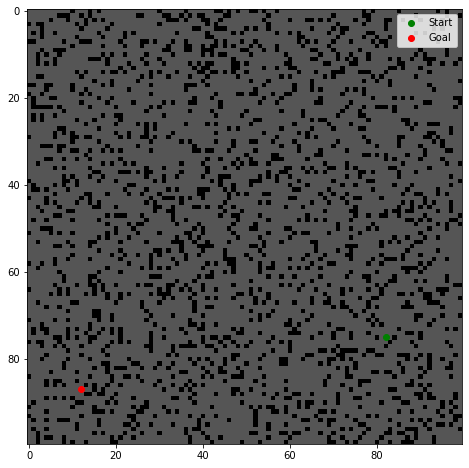

In [8]:
import matplotlib.pyplot as plt

def plot_grid(grid, path=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='gray', origin='upper')
    if path:
        px, py = zip(*path)
        plt.plot(py, px, color='blue')  # Path shown in blue
    plt.scatter(*START[::-1], color='green', label='Start')  # Start
    plt.scatter(*GOAL[::-1], color='red', label='Goal')  # Goal
    plt.legend()
    plt.show()

# Example usage
plot_grid(grid)
